In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
loss_types = ['MSE', 'RE', 'OW','AOW']
taus = [6.0]#,4.0,6.0,8.0,10.0]
n_restarts = 20

In [3]:
if True:
    
    Results = {}

    for loss_type in loss_types:
        for tau in taus:

            filename = '../../saved_results/kol/results_loss_'+loss_type+'_tau'+str(tau)+'.npy'
            Results[loss_type, tau] = np.load(filename, allow_pickle=True).item()

            Results[loss_type,tau]['NN_mean'] = np.mean(np.vstack([Results[loss_type, tau]['NN_'+str(j+1)] 
                                                         for j in range(n_restarts)]), axis=0)

            Results[loss_type,tau]['error'] = np.vstack([Results[loss_type, tau]['true'].flatten()-
                                                         Results[loss_type, tau]['NN_'+str(j+1)]
                                                         for j in range(n_restarts)])

In [4]:
tau = taus[0]
m_tv = int(0.6*len(Results[loss_types[0],tau]['true']))

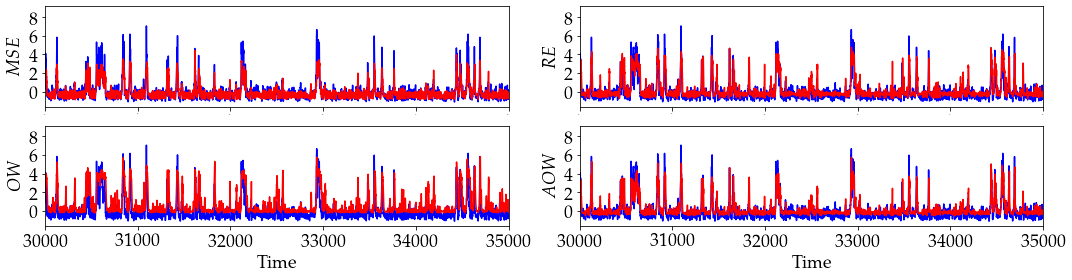

In [5]:
figure(figsize = (15,4))
label_fs = 18
t = 0.1 * np.arange(len(Results[loss_type, tau]['true'])) + 200
labels = loss_types

for j in range(len(loss_types)):
    
    subplot(2,2,j+1)
    ind = np.argmin(Results[loss_types[j],tau]['val_loss'])
    plot(t,Results[loss_types[j], tau]['true'], 'b')
    plot(t,Results[loss_types[j], tau]['NN_mean'], 'r')
    
    xlim([t[m_tv],t[-1]])
    xlim([30000,35000])
    
    ylabel(r'$'+labels[j]+'$', fontsize = label_fs)
    
    yticks([0,2,4,6,8], fontsize = label_fs)
    if j < 2:
        xticks(fontsize = 0)
    else:
        xticks(fontsize = label_fs)
        xlabel('Time', fontsize = label_fs)
                
tight_layout()